In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

import warnings


warnings.filterwarnings('ignore')

# Görselleştirme ayarları
%matplotlib inline
sns.set(style="whitegrid")

print("Tüm kütüphaneler yüklendi.")

Tüm kütüphaneler yüklendi.


In [2]:
#DOSYA YOLLARI YÜKLEME KISMI
path_flights = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/flights.csv'
path_airports = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/airports.csv'
path_airlines = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/airlines.csv'


In [3]:
def load_data(path_flights, path_airports, path_airlines):
   
    try:
        df_flights = pd.read_csv(path_flights, low_memory=False)
        print(f"Flights tablosu yüklendi. Boyut: {df_flights.shape}")
        
        df_airports = pd.read_csv(path_airports)
        print(f"Airports tablosu yüklendi. Boyut: {df_airports.shape}")
        
        df_airlines = pd.read_csv(path_airlines)
        print(f"Airlines tablosu yüklendi. Boyut: {df_airlines.shape}")
        
        return df_flights, df_airports, df_airlines
    
    except FileNotFoundError as e:
        print(f"Dosya bulunamadı. ({e})")
        return None, None, None
    except Exception as e:
        print(f"Hata oluştu. ({e})")
        return None, None, None

print("load_data fonksiyonu tanımlandı.")

load_data fonksiyonu tanımlandı.


In [4]:
try: 
    df_flights = pd.read_csv(path_flights, low_memory=False)
    print(f"Flights tablosunun boyutu : {df_flights.shape}")
    df_airports = pd.read_csv(path_airports)
    print(f"Airports tablosunun boyutu : {df_airports.shape}")
    df_airlines = pd.read_csv(path_airlines)
    print(f"Airlines tablosunun boyutu : {df_airlines.shape}")

except FileNotFoundError as e:
    print(f"Dosya bulunamadı. ({e})")

except Exception as e : 
    print(f"Hata oluştu. ({e})")

Flights tablosunun boyutu : (5819079, 31)
Airports tablosunun boyutu : (322, 7)
Airlines tablosunun boyutu : (14, 2)


# airports veri analizi

In [6]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [7]:
df_airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [8]:
print("her sütunda bulunan toplam null değer sayısı")
df_airports.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [9]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airports.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    322
AIRPORT      322
CITY         308
STATE         54
COUNTRY        1
LATITUDE     319
LONGITUDE    319
dtype: int64

In [10]:
print("Airports tablosunun ilk 5 satırı: ")
df_airports.head(5)

Airports tablosunun ilk 5 satırı: 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [11]:
print("Airports tablosunun son 5 satırı ")
df_airports.tail(5)

Airports tablosunun son 5 satırı 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


# airlines veri analizi


In [12]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [13]:
df_airlines.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,UA,United Air Lines Inc.
freq,1,1


In [14]:
print("her sütunda bulunan toplam null değer sayısı")
df_airlines.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRLINE      0
dtype: int64

In [15]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airlines.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    14
AIRLINE      14
dtype: int64

In [16]:
print("Airlines tablosunun ilk 5 satırı ")
df_airlines.head(5)

Airlines tablosunun ilk 5 satırı 


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [17]:
print("Airlines tablosunun son 5 satırı: ")
df_airlines.tail(5)

Airlines tablosunun son 5 satırı: 


,IATA_CODE,AIRLINE
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
12,MQ,American Eagle Airlines Inc.
13,VX,Virgin America


# flights veri analizi

In [18]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [19]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [20]:
print("her sütunda bulunan toplam null değer sayısı")
df_flights.isnull().sum()

her sütunda bulunan toplam null değer sayısı


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [21]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_flights.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

In [22]:
print("Flights tablosunun ilk 5 satırı ")
df_flights.head(5)

Flights tablosunun ilk 5 satırı 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print("Flights tablosunun son 5 satırı: ")
df_flights.tail(5)

Flights tablosunun son 5 satırı: 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def preprocess_pipeline(df_flights_split, df_airlines_full, df_airports_full):
  
    #TABLO BİRLEŞTİRME İŞLEMLERİ
  
    df = pd.merge(df_flights_split, df_airlines_full, left_on='AIRLINE', right_on='IATA_CODE', how='left')
    df.drop('IATA_CODE', axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_ORIGIN'), left_on='ORIGIN_AIRPORT', right_on='IATA_CODE_ORIGIN', how='left')
    df.drop(['IATA_CODE_ORIGIN'], axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_DEST'), left_on='DESTINATION_AIRPORT', right_on='IATA_CODE_DEST', how='left')
    df.drop(['IATA_CODE_DEST'], axis=1, inplace=True)

    # FAZLA NULL DEĞERLER BARINDIRAN SÜTUNLARIN SİLİNMESİ
    high_null_cols = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    df.drop(columns=high_null_cols, inplace=True)

    #İptal edilen uçuşlar ve yönlendirilen uçuşların kaldırılması.
    
    df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()
    df.drop(columns=['CANCELLED', 'DIVERTED'], inplace=True)

    #Amerika'da uçuşlar 15 dakikadan fazla gecikme olduğu zaman uçuş gecikmiş sayıldığı için 'IS_DELAYED' değişkeni oluşturup bunun üzerinden kontrol edeceğiz.
    df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

    # veri setindeki 'SCHEDULED_DEPARTURE' kısmında saatler normal yazılmamıştır örn: 5,10,15 gibi . Bunu gece sabah öğle akşam ve gece yarısı olarak günün bölümlerine ayırıyoruz.
    df['SCHEDULED_HOUR'] = df['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str[:2].astype(int)
    bins = [-1, 5, 11, 16, 20, 23]
    labels = ['Gece (00-05)', 'Sabah (06-11)', 'Öğle (12-16)', 'Akşam (17-20)', 'Gece Yarısı (21-23)']
    df['TIME_OF_DAY'] = pd.cut(df['SCHEDULED_HOUR'], bins=bins, labels=labels, ordered=False)

    silinecek_sutunlar = [
          #sızıntı yapanlar
        'DEPARTURE_TIME',
        'DEPARTURE_DELAY',
        'TAXI_OUT',
        'WHEELS_OFF',
        'ELAPSED_TIME',
        'AIR_TIME',
        'WHEELS_ON',
        'TAXI_IN',
        'ARRIVAL_TIME',
        'ARRIVAL_DELAY',

        #gereksizler hepsi aynı değer
        'YEAR',
        'COUNTRY_ORIGIN',
        'COUNTRY_DEST',
        
        #gürültüye sebebiyet verenler
        'TAIL_NUMBER',        
        'FLIGHT_NUMBER',

        #eklenen zenginleştirmeler
        'AIRLINE_NAME',
        'AIRPORT_ORIGIN',
        'CITY_ORIGIN',
        'STATE_ORIGIN',
        'LATITUDE_ORIGIN',
        'LONGITUDE_ORIGIN',
        'AIRPORT_DEST',
        'CITY_DEST',
        'STATE_DEST',
        'LATITUDE_DEST',
        'LONGITUDE_DEST',


        #gereksiz değişkenler
        'SCHEDULED_DEPARTURE', 
        'SCHEDULED_HOUR', 
        'SCHEDULED_ARRIVAL'
    ]
    df.drop(columns=silinecek_sutunlar, inplace=True)
    
    df.dropna(inplace=True)

    return df

print("preprocess_pipeline fonksiyonu tanımlandı.")

preprocess_pipeline fonksiyonu tanımlandı.


In [6]:
def encode_features(X_train, X_test, y_train):

   #Target encoding yapıyoruz. Yanı havalimanı kodları yerine ortalama gecikme oranı yazılıyor. One hot encoding yapmaya kalksak çok havalimanı kodu olduğundan çok fazla sütun çıkardı o yüzden target encoding en mantıklısı.
    
    target_encode_cols = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
    ohe_cols = ['AIRLINE', 'TIME_OF_DAY']

    # veri sızıntısını önleme
    train_data_temp = X_train.copy()
    train_data_temp['IS_DELAYED'] = y_train

    for col in target_encode_cols:
        mapping = train_data_temp.groupby(col)['IS_DELAYED'].mean()
        X_train[col + '_ENCODED'] = X_train[col].map(mapping)
        X_test[col + '_ENCODED'] = X_test[col].map(mapping)
        global_mean = y_train.mean()
        X_train[col + '_ENCODED'].fillna(global_mean, inplace=True)
        X_test[col + '_ENCODED'].fillna(global_mean, inplace=True)
        
    # ohe 
    X_train = pd.get_dummies(X_train, columns=ohe_cols, prefix=ohe_cols, dtype=int)
    X_test = pd.get_dummies(X_test, columns=ohe_cols, prefix=ohe_cols, dtype=int)

    # sütun hizalama
    train_cols = X_train.columns
    X_test = X_test.reindex(columns=train_cols, fill_value=0)

    # eski sütunları silme
    X_train.drop(columns=target_encode_cols, inplace=True)
    X_test.drop(columns=target_encode_cols, inplace=True)
    
    print("Encoding işlemleri tamamlandı.")
    return X_train, X_test

print("encode_features fonksiyonu tanımlandı.")

encode_features fonksiyonu tanımlandı.


In [7]:
#DOSYA YOLLARI YÜKLEME KISMI
path_flights = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/flights.csv'
path_airports = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/airports.csv'
path_airlines = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/airlines.csv'



#veri yükleme
df_flights, df_airports, df_airlines = load_data(path_flights, path_airports, path_airlines)

if df_flights is not None:
    
    #veriyi test ve train olarak bölme
    
    flights_train, flights_test = train_test_split(df_flights, test_size=0.2, random_state=42)
    print(f"Flights Train boyutu: {flights_train.shape}")
    print(f"Flights Test boyutu: {flights_test.shape}")
    

    df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)
    
    print("\nEğitim verisi için proses pipeline fonksiyonu çağırılıyor ")
    train_df = preprocess_pipeline(flights_train, df_airlines, df_airports)
    
    print("Test verisi için proses pipeline fonksiyonu çağırılıyor")
    test_df = preprocess_pipeline(flights_test, df_airlines, df_airports)
    

    print(f"Train Veri Boyutu: {train_df.shape}")
    print(f"Test Veri Boyutu: {test_df.shape}")

else:
    print("Veri yüklenemedi, işlemler durduruldu.")

Flights tablosu yüklendi. Boyut: (5819079, 31)
Airports tablosu yüklendi. Boyut: (322, 7)
Airlines tablosu yüklendi. Boyut: (14, 2)
Flights Train boyutu: (4655263, 31)
Flights Test boyutu: (1163816, 31)

Eğitim verisi için proses pipeline fonksiyonu çağırılıyor 
Test verisi için proses pipeline fonksiyonu çağırılıyor
Train Veri Boyutu: (4571137, 10)
Test Veri Boyutu: (1142871, 10)


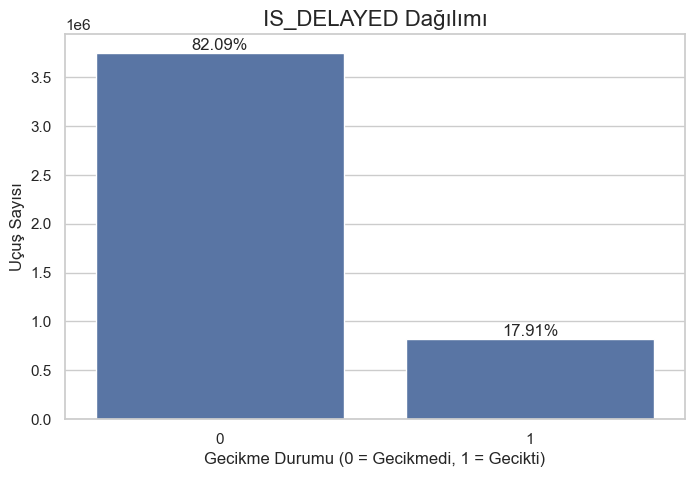


Sayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):


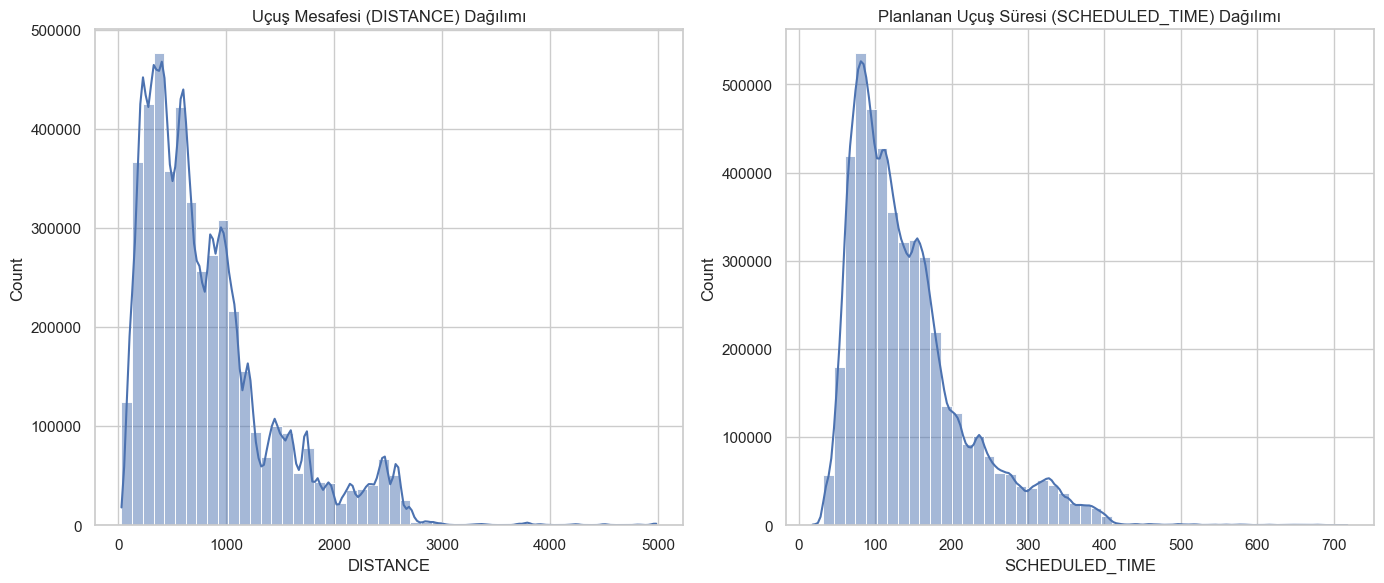


Sayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:


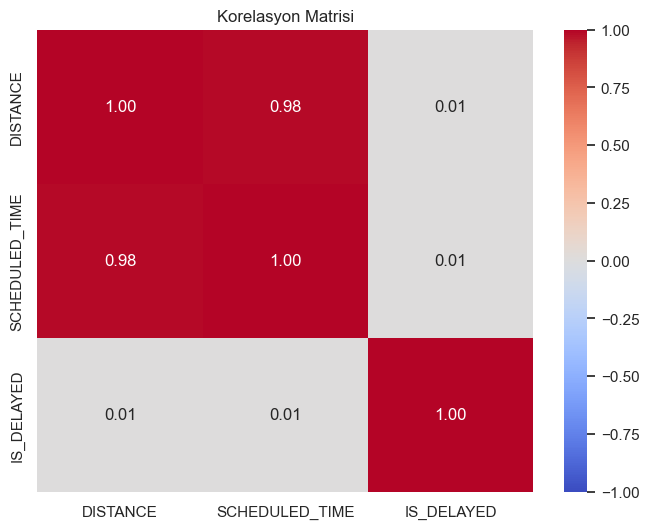

In [8]:
if 'train_df' in locals():
  

    # EDA
    plt.figure(figsize=(8, 5))
    sns.countplot(x='IS_DELAYED', data=train_df)
    plt.title('IS_DELAYED Dağılımı', fontsize=16)
    plt.xlabel('Gecikme Durumu (0 = Gecikmedi, 1 = Gecikti)')
    plt.ylabel('Uçuş Sayısı')
    
    # yüzde hesaplama
    
    total = len(train_df)
    ax = plt.gca()
    for p in ax.patches:
        percentage = f'{(p.get_height() / total * 100):.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    plt.show()
  


    # Histogram
    
    print(f"\nSayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):")
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df['DISTANCE'], kde=True, bins=50)
    plt.title('Uçuş Mesafesi (DISTANCE) Dağılımı')

    plt.subplot(1, 2, 2)
    sns.histplot(train_df['SCHEDULED_TIME'], kde=True, bins=50)
    plt.title('Planlanan Uçuş Süresi (SCHEDULED_TIME) Dağılımı')
    plt.tight_layout()
    plt.show()

    numeric_features = ['DISTANCE', 'SCHEDULED_TIME']
    # Korelasyon
    
    print("\nSayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:")
    
    # Korelasyon matrisi
    corr_df = train_df[numeric_features + ['IS_DELAYED']].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Korelasyon Matrisi')
    plt.show()
    

else:
    print("Veriler bulunamadı.")

In [9]:
if 'train_df' in locals():
    # x = özellik, y = hedef oluşturma
    
    X_train = train_df.drop('IS_DELAYED', axis=1)
    y_train = train_df['IS_DELAYED']
    
    X_test = test_df.drop('IS_DELAYED', axis=1)
    y_test = test_df['IS_DELAYED']

    # Encoding
    
    X_train_encoded, X_test_encoded = encode_features(X_train, X_test, y_train)
  
    print(f"Eğitime hazır X_train_encoded boyutu: {X_train_encoded.shape}")
    print(f"Teste hazır X_test_encoded boyutu: {X_test_encoded.shape}")
    
 
    
else:
    print("Veriler bulunamadı.")

Encoding işlemleri tamamlandı.
Eğitime hazır X_train_encoded boyutu: (4571137, 26)
Teste hazır X_test_encoded boyutu: (1142871, 26)


#Final Kısmı Model Eğitimi

In [38]:
!pip install xgboost

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

# Örneklem büyüklüğü
SAMPLE_SIZE = 100000

print(f"Eğitim verisi boyutu {X_train_encoded.shape[0]} satırdan {SAMPLE_SIZE} satıra düşürülüyor...")

if X_train_encoded.shape[0] > SAMPLE_SIZE:
    # Rastgele bir alt örnekleme (indeks) oluştur
    # random_state'i 42 tutarak her çalıştırmada aynı örneği almasını sağlıyoruz
    np.random.seed(42)
    sample_indices = np.random.choice(
        X_train_encoded.index, 
        size=SAMPLE_SIZE, 
        replace=False
    )
    
    # Yeni, küçültülmüş eğitim setlerini oluştur
    X_train_sampled = X_train_encoded.loc[sample_indices]
    y_train_sampled = y_train.loc[sample_indices]
    
    # Yeni değişkenleri atayarak önceki kodların çalışmasını kolaylaştır
    # Tüm model eğitim hücreleri artık bu küçültülmüş veri setlerini kullanacak
    X_train_encoded = X_train_sampled
    y_train = y_train_sampled
    
    print("\nAlt Örnekleme Başarılı:")
    print(f"Yeni X_train_encoded boyutu: {X_train_encoded.shape}")
    print(f"Yeni y_train boyutu: {y_train.shape}")
    print(f"Test verisi boyutu: {X_test_encoded.shape} (Değişmedi)")
    print("\nArtık sonraki hücrelerdeki XGBoost modelini eğitebilirsiniz.")
else:
    print("Eğitim verisi zaten 100.000 satırdan küçük veya eşit. Alt örnekleme yapılmadı.")

Eğitim verisi boyutu 4571137 satırdan 100000 satıra düşürülüyor...

Alt Örnekleme Başarılı:
Yeni X_train_encoded boyutu: (100000, 26)
Yeni y_train boyutu: (100000,)
Test verisi boyutu: (1142871, 26) (Değişmedi)

Artık sonraki hücrelerdeki XGBoost modelini eğitebilirsiniz.


        1. SENARYO: BASE XGBOOST MODEL (Sadece Model)
        Kullanılan Toplam Sütun Sayısı: 26
Hesaplanan scale_pos_weight: 4.54

XGBoost (Base) eğitiliyor...
Eğitim Tamamlandı! Süre: 1.49 saniye

--- MODEL PERFORMANSI (BASE XGBOOST) ---
Accuracy  : %70.05
Precision : %30.37
Recall    : %52.05
ROC AUC   : %68.21
PR AUC    : %33.31
F1 Score  : %38.36
MAE       : 0.2995

Sınıf Bazlı Kırılım:
-------------------------------------------------------------------------------------
Model                               | % Precision  | % Recall   | % F1-Score
-------------------------------------------------------------------------------------
XGBoost Base 0 (Gecikmedi)          | 87.61        | 73.97      | 80.22     
XGBoost Base 1 (Gecikti)            | 30.37        | 52.05      | 38.36     
-------------------------------------------------------------------------------------


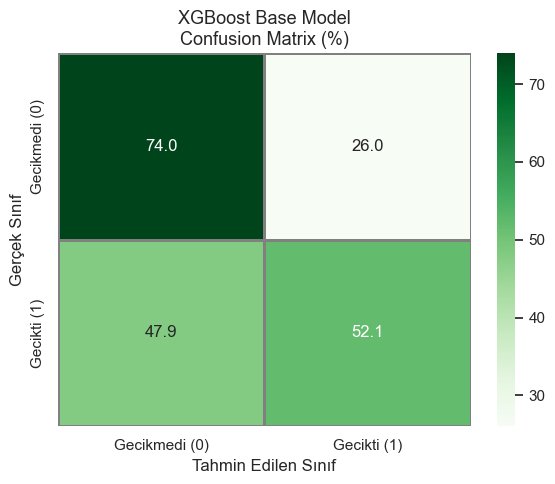

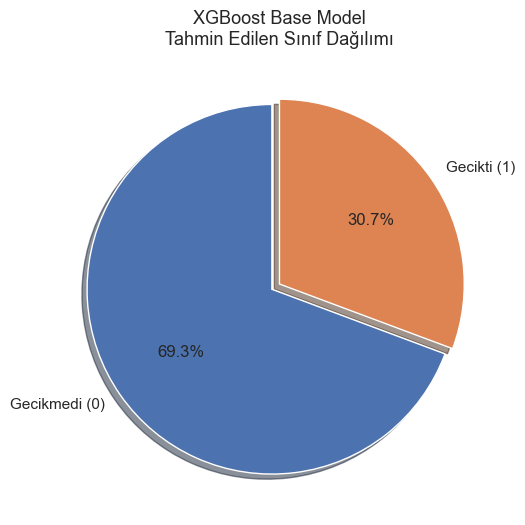

Model Tamamlandı | Kullanılan Toplam Sütun Sayısı: 26


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    mean_absolute_error,
    average_precision_score,
    confusion_matrix,
    precision_score,      # Yeni eklendi
    recall_score,         # Yeni eklendi
    classification_report # Sınıf bazlı tablo için eklendi
)
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --------------------------------------------------
# Sonuçları saklamak için liste
# --------------------------------------------------
if 'xgb_results' not in locals():
    xgb_results = []

if 'X_train_encoded' in locals():

    # ==================================================
    # 🔹 BAŞLANGIÇTA SÜTUN SAYISI
    # ==================================================
    sutun_sayisi = X_train_encoded.shape[1]

    print("=" * 95)
    print("        1. SENARYO: BASE XGBOOST MODEL (Sadece Model)")
    print(f"        Kullanılan Toplam Sütun Sayısı: {sutun_sayisi}")
    print("=" * 95)

    # --------------------------------------------------
    # Dengesiz veri seti için scale_pos_weight
    # --------------------------------------------------
    neg_count = len(y_train) - sum(y_train)
    pos_count = sum(y_train)
    scale_weight = neg_count / pos_count

    print(f"Hesaplanan scale_pos_weight: {scale_weight:.2f}")

    # --------------------------------------------------
    # Model Tanımı
    # --------------------------------------------------
    xgb_base = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=10,
        scale_pos_weight=scale_weight,
        tree_method='hist',
        n_jobs=-1,
        random_state=42,
        eval_metric='logloss'
    )

    print("\nXGBoost (Base) eğitiliyor...")
    start = time.time()

    # --------------------------------------------------
    # Eğitim
    # --------------------------------------------------
    xgb_base.fit(X_train_encoded, y_train)

    # --------------------------------------------------
    # Tahmin
    # --------------------------------------------------
    y_pred = xgb_base.predict(X_test_encoded)
    y_prob = xgb_base.predict_proba(X_test_encoded)[:, 1]

    sure = time.time() - start
    print(f"Eğitim Tamamlandı! Süre: {sure:.2f} saniye")

    # --------------------------------------------------
    # Metriklerin Hesaplanması
    # --------------------------------------------------
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100 # Yeni eklendi
    rec = recall_score(y_test, y_pred) * 100    # Yeni eklendi
    f1 = f1_score(y_test, y_pred) * 100
    roc_auc = roc_auc_score(y_test, y_prob) * 100
    pr_auc = average_precision_score(y_test, y_prob) * 100
    mae = mean_absolute_error(y_test, y_pred)

    # Sınıf bazlı rapor verilerini alıyoruz
    report = classification_report(y_test, y_pred, output_dict=True)

    # --------------------------------------------------
    # Sonuçları Kaydet
    # --------------------------------------------------
    xgb_results.append({
        "Senaryo": "Base XGBoost",
        "Sütun Sayısı": sutun_sayisi,
        "Accuracy (%)": acc,
        "Precision (%)": prec, # Eklendi
        "Recall (%)": rec,    # Eklendi
        "ROC AUC (%)": roc_auc,
        "PR AUC (%)": pr_auc,
        "F1 Score (%)": f1,
        "MAE": mae,
        "Süre (sn)": sure
    })

    # --------------------------------------------------
    # Sonuçları Yazdır
    # --------------------------------------------------
    print("\n--- MODEL PERFORMANSI (BASE XGBOOST) ---")
    print(f"Accuracy  : %{acc:.2f}")
    print(f"Precision : %{prec:.2f}") # Eklendi
    print(f"Recall    : %{rec:.2f}")    # Eklendi
    print(f"ROC AUC   : %{roc_auc:.2f}")
    print(f"PR AUC    : %{pr_auc:.2f}")
    print(f"F1 Score  : %{f1:.2f}")
    print(f"MAE       : {mae:.4f}")

    # --------------------------------------------------
    # SINIF BAZLI KIRILIM (İstediğin Tablo Formatı)
    # --------------------------------------------------
    print("\nSınıf Bazlı Kırılım:")
    print("-" * 85)
    print(f"{'Model':<35} | {'% Precision':<12} | {'% Recall':<10} | {'% F1-Score':<10}")
    print("-" * 85)
    
    # Sınıf 0 (Gecikmedi)
    s0_p = report['0']['precision'] * 100
    s0_r = report['0']['recall'] * 100
    s0_f = report['0']['f1-score'] * 100
    print(f"{'XGBoost Base 0 (Gecikmedi)':<35} | {s0_p:<12.2f} | {s0_r:<10.2f} | {s0_f:<10.2f}")
    
    # Sınıf 1 (Gecikti)
    s1_p = report['1']['precision'] * 100
    s1_r = report['1']['recall'] * 100
    s1_f = report['1']['f1-score'] * 100
    print(f"{'XGBoost Base 1 (Gecikti)':<35} | {s1_p:<12.2f} | {s1_r:<10.2f} | {s1_f:<10.2f}")
    print("-" * 85)

    # ==================================================
    # CONFUSION MATRIX (YÜZDELİ & ŞIK)
    # ==================================================
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm / cm.sum(axis=1).reshape(-1, 1) * 100

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm_percent,
        annot=True,
        fmt=".1f",
        cmap="Greens",
        linewidths=1,
        linecolor="gray",
        xticklabels=['Gecikmedi (0)', 'Gecikti (1)'],
        yticklabels=['Gecikmedi (0)', 'Gecikti (1)']
    )
    plt.title("XGBoost Base Model\nConfusion Matrix (%)", fontsize=13)
    plt.ylabel("Gerçek Sınıf")
    plt.xlabel("Tahmin Edilen Sınıf")
    plt.tight_layout()
    plt.show()

    # ==================================================
    # PASTA GRAFİĞİ – MODEL TAHMİN DAĞILIMI
    # ==================================================
    labels = ['Gecikmedi (0)', 'Gecikti (1)']
    values = [(y_pred == 0).sum(), (y_pred == 1).sum()]

    plt.figure(figsize=(6, 6))
    plt.pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        explode=(0.05, 0),
        startangle=90,
        shadow=True
    )
    plt.title("XGBoost Base Model\nTahmin Edilen Sınıf Dağılımı", fontsize=13)
    plt.show()

    # ==================================================
    # 🔹 EN SONDA SÜTUN SAYISI
    # ==================================================
    print("=" * 95)
    print(f"Model Tamamlandı | Kullanılan Toplam Sütun Sayısı: {sutun_sayisi}")
    print("=" * 95)

else:
    print("❌ Veri bulunamadı! (X_train_encoded yok)")

      2. SENARYO: FEATURE SELECTION + XGBOOST
      Başlangıç Sütun Sayısı: 26

Feature Selection + XGBoost eğitiliyor...
Eğitim Tamamlandı! Süre: 1.63 sn
Seçilen Sütun Sayısı: 15

--- MODEL PERFORMANSI (FS + XGB) ---
Accuracy  : %68.79
Precision : %29.65
Recall    : %54.13
ROC AUC   : %68.07
PR AUC    : %33.34
F1 Score  : %38.31
MAE       : 0.3121

Sınıf Bazlı Kırılım:
-------------------------------------------------------------------------------------
Model                               | % Precision  | % Recall   | % F1-Score
-------------------------------------------------------------------------------------
FS+XGBoost 0 (Gecikmedi)            | 87.80        | 71.98      | 79.11     
FS+XGBoost 1 (Gecikti)              | 29.65        | 54.13      | 38.31     
-------------------------------------------------------------------------------------


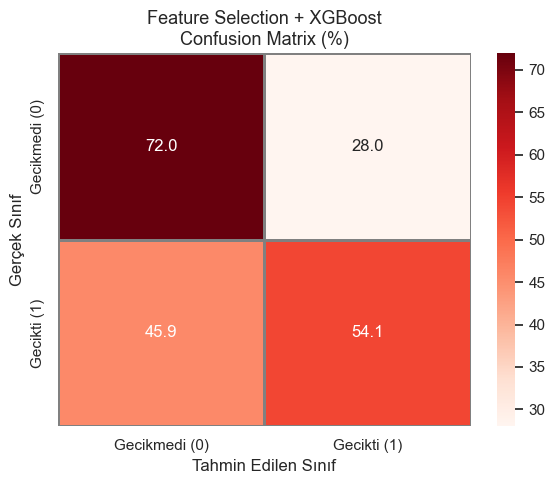

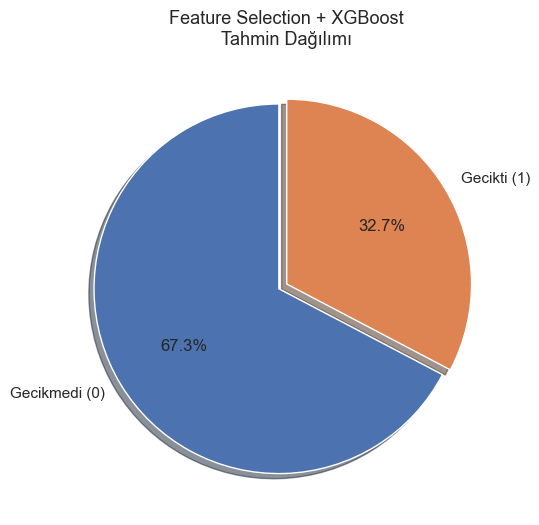

Sütun Sayısı: 26 → 15


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    mean_absolute_error,
    average_precision_score,
    confusion_matrix,
    precision_score,      # Yeni eklendi
    recall_score,         # Yeni eklendi
    classification_report # Sınıf bazlı tablo için eklendi
)
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'X_train_encoded' in locals():

    # ==================================================
    # 🔹 BAŞLANGIÇ SÜTUN SAYISI
    # ==================================================
    baslangic_sutun = X_train_encoded.shape[1]

    print("=" * 95)
    print("      2. SENARYO: FEATURE SELECTION + XGBOOST")
    print(f"      Başlangıç Sütun Sayısı: {baslangic_sutun}")
    print("=" * 95)

    # --------------------------------------------------
    # Dengesiz veri seti için scale_pos_weight
    # --------------------------------------------------
    neg_count = len(y_train) - sum(y_train)
    pos_count = sum(y_train)
    scale_weight = neg_count / pos_count

    # --------------------------------------------------
    # Feature Selection Modeli
    # --------------------------------------------------
    selection_model = XGBClassifier(
        n_estimators=50,
        tree_method='hist',
        random_state=42,
        eval_metric='logloss'
    )

    # --------------------------------------------------
    # Pipeline: Scaling → Feature Selection → XGBoost
    # --------------------------------------------------
    pipeline_fs = Pipeline([
        ('scaler', StandardScaler()),
        ('selection', SelectFromModel(
            estimator=selection_model,
            max_features=15,
            threshold=-np.inf
        )),
        ('model', XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=10,
            scale_pos_weight=scale_weight,
            tree_method='hist',
            n_jobs=-1,
            random_state=42,
            eval_metric='logloss'
        ))
    ])

    print("\nFeature Selection + XGBoost eğitiliyor...")
    start = time.time()

    # --------------------------------------------------
    # Eğitim
    # --------------------------------------------------
    pipeline_fs.fit(X_train_encoded, y_train)

    # --------------------------------------------------
    # Tahmin
    # --------------------------------------------------
    y_pred = pipeline_fs.predict(X_test_encoded)
    y_prob = pipeline_fs.predict_proba(X_test_encoded)[:, 1]

    sure = time.time() - start

    # ==================================================
    # 🔹 SEÇİLEN SÜTUN SAYISI
    # ==================================================
    selected_mask = pipeline_fs.named_steps['selection'].get_support()
    selected_feat = selected_mask.sum()

    # --------------------------------------------------
    # Metriklerin Hesaplanması
    # --------------------------------------------------
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100 # Yeni eklendi
    rec = recall_score(y_test, y_pred) * 100    # Yeni eklendi
    f1 = f1_score(y_test, y_pred) * 100
    roc_auc = roc_auc_score(y_test, y_prob) * 100
    pr_auc = average_precision_score(y_test, y_prob) * 100
    mae = mean_absolute_error(y_test, y_pred)

    # Sınıf bazlı rapor verilerini alıyoruz
    report = classification_report(y_test, y_pred, output_dict=True)

    # --------------------------------------------------
    # Sonuçları Listeye Ekle
    # --------------------------------------------------
    xgb_results.append({
        "Senaryo": "Feature Selection + XGBoost",
        "Başlangıç Sütun": baslangic_sutun,
        "Seçilen Sütun": selected_feat,
        "Accuracy (%)": acc,
        "Precision (%)": prec, # Eklendi
        "Recall (%)": rec,    # Eklendi
        "ROC AUC (%)": roc_auc,
        "PR AUC (%)": pr_auc,
        "F1 Score (%)": f1,
        "MAE": mae,
        "Süre (sn)": sure
    })

    print(f"Eğitim Tamamlandı! Süre: {sure:.2f} sn")
    print(f"Seçilen Sütun Sayısı: {selected_feat}")

    # --------------------------------------------------
    # Sonuçları Yazdır
    # --------------------------------------------------
    print("\n--- MODEL PERFORMANSI (FS + XGB) ---")
    print(f"Accuracy  : %{acc:.2f}")
    print(f"Precision : %{prec:.2f}") # Eklendi
    print(f"Recall    : %{rec:.2f}")    # Eklendi
    print(f"ROC AUC   : %{roc_auc:.2f}")
    print(f"PR AUC    : %{pr_auc:.2f}")
    print(f"F1 Score  : %{f1:.2f}")
    print(f"MAE       : {mae:.4f}")

    # --------------------------------------------------
    # SINIF BAZLI KIRILIM (Görseldeki gibi)
    # --------------------------------------------------
    print("\nSınıf Bazlı Kırılım:")
    print("-" * 85)
    print(f"{'Model':<35} | {'% Precision':<12} | {'% Recall':<10} | {'% F1-Score':<10}")
    print("-" * 85)
    
    # Sınıf 0 (Gecikmedi)
    s0_p = report['0']['precision'] * 100
    s0_r = report['0']['recall'] * 100
    s0_f = report['0']['f1-score'] * 100
    print(f"{'FS+XGBoost 0 (Gecikmedi)':<35} | {s0_p:<12.2f} | {s0_r:<10.2f} | {s0_f:<10.2f}")
    
    # Sınıf 1 (Gecikti)
    s1_p = report['1']['precision'] * 100
    s1_r = report['1']['recall'] * 100
    s1_f = report['1']['f1-score'] * 100
    print(f"{'FS+XGBoost 1 (Gecikti)':<35} | {s1_p:<12.2f} | {s1_r:<10.2f} | {s1_f:<10.2f}")
    print("-" * 85)

    # ==================================================
    # CONFUSION MATRIX (YÜZDELİ)
    # ==================================================
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm / cm.sum(axis=1).reshape(-1, 1) * 100

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm_percent,
        annot=True,
        fmt=".1f",
        cmap="Reds",
        linewidths=1,
        linecolor="gray",
        xticklabels=['Gecikmedi (0)', 'Gecikti (1)'],
        yticklabels=['Gecikmedi (0)', 'Gecikti (1)']
    )
    plt.title("Feature Selection + XGBoost\nConfusion Matrix (%)", fontsize=13)
    plt.ylabel("Gerçek Sınıf")
    plt.xlabel("Tahmin Edilen Sınıf")
    plt.tight_layout()
    plt.show()

    # ==================================================
    # PASTA GRAFİĞİ – TAHMİN DAĞILIMI
    # ==================================================
    labels = ['Gecikmedi (0)', 'Gecikti (1)']
    values = [(y_pred == 0).sum(), (y_pred == 1).sum()]

    plt.figure(figsize=(6, 6))
    plt.pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        explode=(0.05, 0),
        startangle=90,
        shadow=True
    )
    plt.title("Feature Selection + XGBoost\nTahmin Dağılımı", fontsize=13)
    plt.show()

    # ==================================================
    # 🔹 EN SONDA SÜTUN ÖZETİ
    # ==================================================
    print("=" * 95)
    print(f"Sütun Sayısı: {baslangic_sutun} → {selected_feat}")
    print("=" * 95)

else:
    print("❌ Gerekli veri setleri bulunamadı (X_train_encoded yok)")

      3. SENARYO: PCA (DIMENSIONALITY REDUCTION) + XGBOOST
      Başlangıç Sütun Sayısı : 26
      PCA Bileşen Sayısı     : 10

PCA + XGBoost eğitiliyor...
Eğitim Tamamlandı! Süre: 2.25 sn

--- MODEL PERFORMANSI (PCA + XGB) ---
Accuracy  : %66.80
Precision : %26.56
Recall    : %48.39
ROC AUC   : %63.83
PR AUC    : %27.32
F1 Score  : %34.30
MAE       : 0.3320

Sınıf Bazlı Kırılım:
-------------------------------------------------------------------------------------
Model                               | % Precision  | % Recall   | % F1-Score
-------------------------------------------------------------------------------------
PCA+XGBoost 0 (Gecikmedi)           | 86.29        | 70.82      | 77.79     
PCA+XGBoost 1 (Gecikti)             | 26.56        | 48.39      | 34.30     
-------------------------------------------------------------------------------------


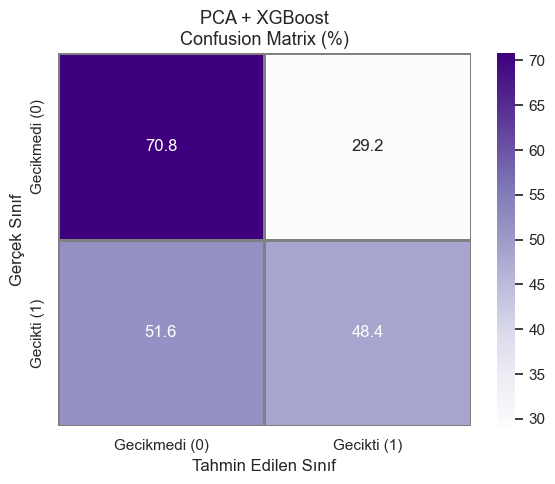

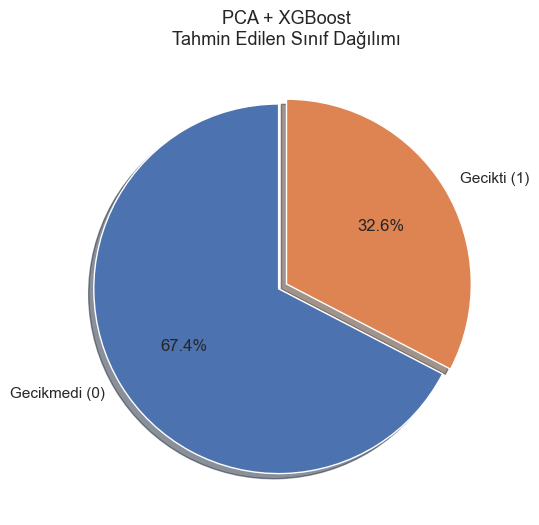

Sütun Sayısı: 26 → 10


In [13]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    mean_absolute_error,
    confusion_matrix,
    precision_score,      # Yeni eklendi
    recall_score,         # Yeni eklendi
    classification_report # Sınıf bazlı tablo için eklendi
)
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'X_train_encoded' in locals():

    # ==================================================
    # 🔹 BAŞLANGIÇ SÜTUN SAYISI
    # ==================================================
    baslangic_sutun = X_train_encoded.shape[1]
    pca_bilesen = 10

    print("=" * 95)
    print("      3. SENARYO: PCA (DIMENSIONALITY REDUCTION) + XGBOOST")
    print(f"      Başlangıç Sütun Sayısı : {baslangic_sutun}")
    print(f"      PCA Bileşen Sayısı     : {pca_bilesen}")
    print("=" * 95)

    # --------------------------------------------------
    # PCA Pipeline
    # --------------------------------------------------
    # scale_weight değerinin önceki senaryolardan geldiği varsayılmaktadır.
    pipeline_pca = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=pca_bilesen, random_state=42)),
        ('model', XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=10,
            scale_pos_weight=scale_weight if 'scale_weight' in locals() else 1,
            tree_method='hist',
            n_jobs=-1,
            random_state=42,
            eval_metric='logloss'
        ))
    ])

    print("\nPCA + XGBoost eğitiliyor...")
    start = time.time()

    # --------------------------------------------------
    # Eğitim
    # --------------------------------------------------
    pipeline_pca.fit(X_train_encoded, y_train)

    # --------------------------------------------------
    # Tahmin
    # --------------------------------------------------
    y_pred = pipeline_pca.predict(X_test_encoded)
    y_prob = pipeline_pca.predict_proba(X_test_encoded)[:, 1]

    sure = time.time() - start
    print(f"Eğitim Tamamlandı! Süre: {sure:.2f} sn")

    # --------------------------------------------------
    # Metriklerin Hesaplanması
    # --------------------------------------------------
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100 # Yeni eklendi
    rec = recall_score(y_test, y_pred) * 100    # Yeni eklendi
    f1 = f1_score(y_test, y_pred) * 100
    roc_auc = roc_auc_score(y_test, y_prob) * 100
    pr_auc = average_precision_score(y_test, y_prob) * 100
    mae = mean_absolute_error(y_test, y_pred)

    # Sınıf bazlı rapor verilerini alıyoruz
    report = classification_report(y_test, y_pred, output_dict=True)

    # --------------------------------------------------
    # Sonuçları kaydet
    # --------------------------------------------------
    xgb_results.append({
        "Senaryo": "PCA + XGBoost",
        "Başlangıç Sütun": baslangic_sutun,
        "Seçilen Sütun": pca_bilesen,
        "Accuracy (%)": acc,
        "Precision (%)": prec, # Eklendi
        "Recall (%)": rec,    # Eklendi
        "ROC AUC (%)": roc_auc,
        "PR AUC (%)": pr_auc,
        "F1 Score (%)": f1,
        "MAE": mae,
        "Süre (sn)": sure
    })

    # --------------------------------------------------
    # Sonuçları yazdır
    # --------------------------------------------------
    print("\n--- MODEL PERFORMANSI (PCA + XGB) ---")
    print(f"Accuracy  : %{acc:.2f}")
    print(f"Precision : %{prec:.2f}") # Eklendi
    print(f"Recall    : %{rec:.2f}")    # Eklendi
    print(f"ROC AUC   : %{roc_auc:.2f}")
    print(f"PR AUC    : %{pr_auc:.2f}")
    print(f"F1 Score  : %{f1:.2f}")
    print(f"MAE       : {mae:.4f}")

    # --------------------------------------------------
    # SINIF BAZLI KIRILIM (Görseldeki gibi)
    # --------------------------------------------------
    print("\nSınıf Bazlı Kırılım:")
    print("-" * 85)
    print(f"{'Model':<35} | {'% Precision':<12} | {'% Recall':<10} | {'% F1-Score':<10}")
    print("-" * 85)
    
    # Sınıf 0 (Gecikmedi)
    s0_p = report['0']['precision'] * 100
    s0_r = report['0']['recall'] * 100
    s0_f = report['0']['f1-score'] * 100
    print(f"{'PCA+XGBoost 0 (Gecikmedi)':<35} | {s0_p:<12.2f} | {s0_r:<10.2f} | {s0_f:<10.2f}")
    
    # Sınıf 1 (Gecikti)
    s1_p = report['1']['precision'] * 100
    s1_r = report['1']['recall'] * 100
    s1_f = report['1']['f1-score'] * 100
    print(f"{'PCA+XGBoost 1 (Gecikti)':<35} | {s1_p:<12.2f} | {s1_r:<10.2f} | {s1_f:<10.2f}")
    print("-" * 85)

    # ==================================================
    # CONFUSION MATRIX (YÜZDELİ & ŞIK)
    # ==================================================
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm / cm.sum(axis=1).reshape(-1, 1) * 100

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm_percent,
        annot=True,
        fmt=".1f",
        cmap="Purples",
        linewidths=1,
        linecolor="gray",
        xticklabels=['Gecikmedi (0)', 'Gecikti (1)'],
        yticklabels=['Gecikmedi (0)', 'Gecikti (1)']
    )
    plt.title("PCA + XGBoost\nConfusion Matrix (%)", fontsize=13)
    plt.ylabel("Gerçek Sınıf")
    plt.xlabel("Tahmin Edilen Sınıf")
    plt.tight_layout()
    plt.show()

    # ==================================================
    # PASTA GRAFİĞİ – TAHMİN DAĞILIMI
    # ==================================================
    labels = ['Gecikmedi (0)', 'Gecikti (1)']
    values = [(y_pred == 0).sum(), (y_pred == 1).sum()]

    plt.figure(figsize=(6, 6))
    plt.pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        explode=(0.05, 0),
        startangle=90,
        shadow=True
    )
    plt.title("PCA + XGBoost\nTahmin Edilen Sınıf Dağılımı", fontsize=13)
    plt.show()

    # ==================================================
    # 🔹 EN SONDA SÜTUN ÖZETİ
    # ==================================================
    print("=" * 95)
    print(f"Sütun Sayısı: {baslangic_sutun} → {pca_bilesen}")
    print("=" * 95)

else:
    print("❌ Veri hatası (X_train_encoded bulunamadı)")


             XGBOOST MODELLERİ – NİHAİ KARŞILAŞTIRMA TABLOSU


,Kullanılan Sütun,Accuracy (%),Precision (%),Recall (%),ROC AUC (%),PR AUC (%),F1 Score (%),MAE,Süre (sn)
Senaryo,,,,,,,,,
Base XGBoost,26.0,70.05,30.37,52.05,68.21,33.31,38.36,0.30,1.49
Feature Selection + XGBoost,15.0,68.79,29.65,54.13,68.07,33.34,38.31,0.31,1.63
PCA + XGBoost,10.0,66.80,26.56,48.39,63.83,27.32,34.30,0.33,2.25


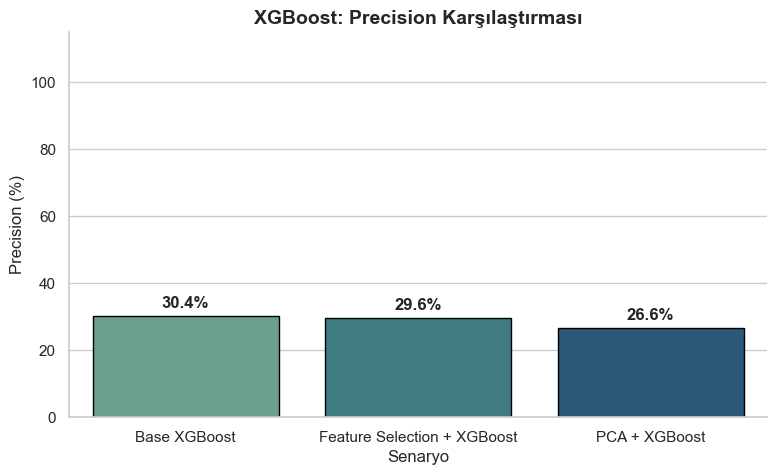

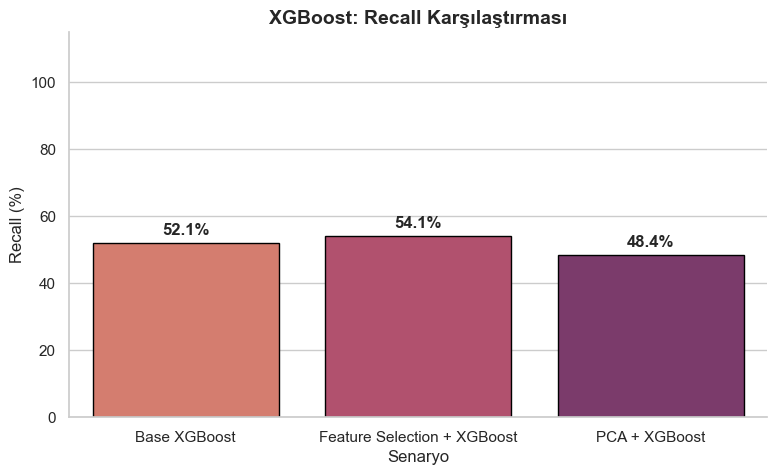

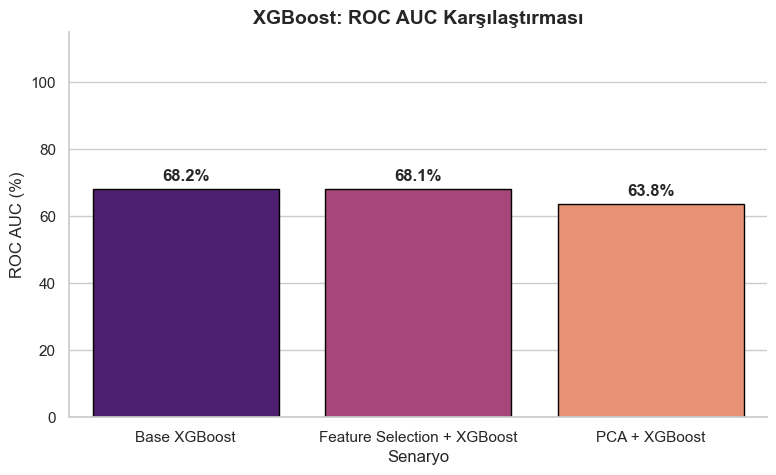

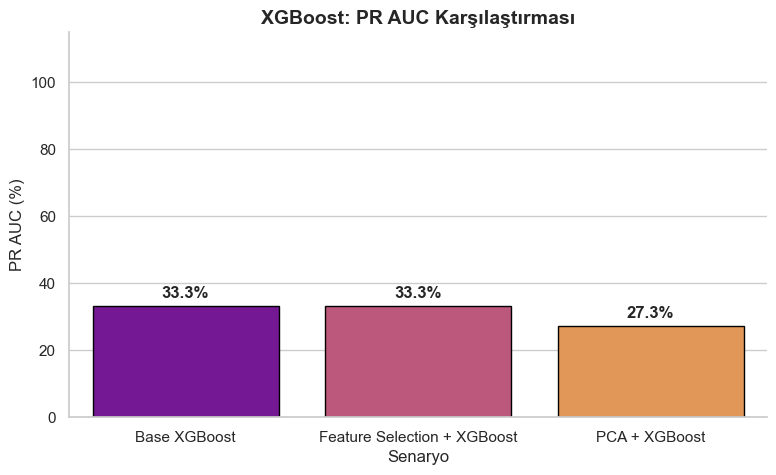

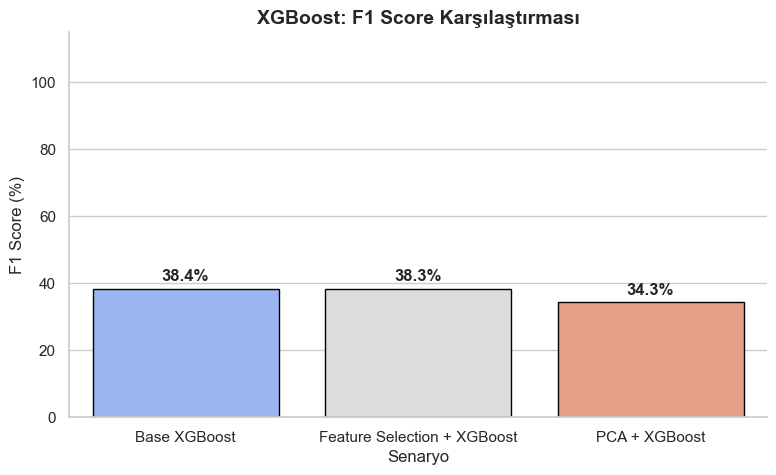

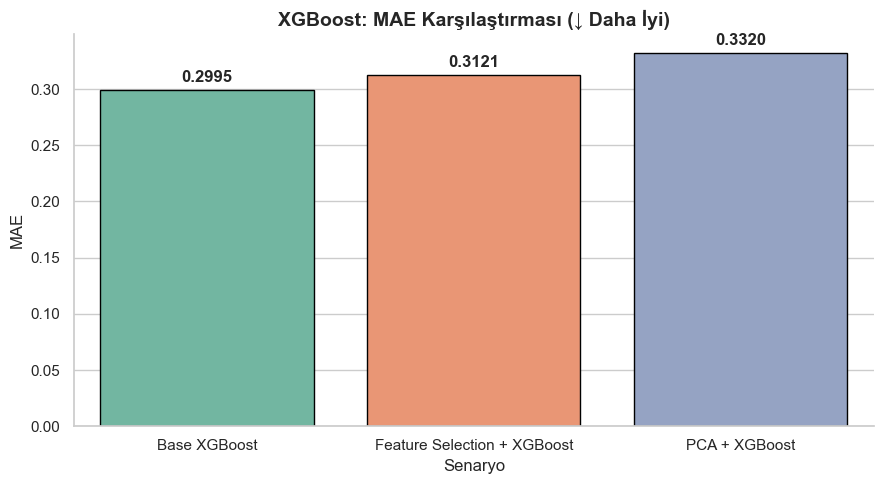

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# --------------------------------------------------
# XGBOOST KARŞILAŞTIRMA – TÜM GRAFİKLER (AYRI)
# --------------------------------------------------
df_xgb = pd.DataFrame(xgb_results)

# 1. Senaryo isimlerini standardize edelim
name_map = {
    "Base XGBoost": "Base XGBoost",
    "Feature Selection + XGBoost": "Feature Selection + XGBoost",
    "PCA + XGBoost": "PCA + XGBoost"
}
df_xgb["Senaryo"] = df_xgb["Senaryo"].replace(name_map)

# 2. Sütun sayısını tek kolona indirme
def resolve_feature_count(row):
    if "Kullanılan Sütun" in row and pd.notna(row.get("Kullanılan Sütun")):
        return row["Kullanılan Sütun"]
    if "Seçilen Sütun" in row and pd.notna(row.get("Seçilen Sütun")):
        return row["Seçilen Sütun"]
    if "Sütun Sayısı" in row and pd.notna(row.get("Sütun Sayısı")):
        return row["Sütun Sayısı"]
    return None

df_xgb["Kullanılan Sütun"] = df_xgb.apply(resolve_feature_count, axis=1)
df_xgb = df_xgb.drop_duplicates(subset="Senaryo", keep="last")

# 3. Sıralama
df_xgb["Senaryo"] = pd.Categorical(df_xgb["Senaryo"], categories=list(name_map.values()), ordered=True)
df_xgb = df_xgb.sort_values("Senaryo")

# Metrik Listesi
main_metrics = ["Accuracy (%)", "Precision (%)", "Recall (%)", "ROC AUC (%)", "PR AUC (%)", "F1 Score (%)", "MAE"]

print("\n" + "="*110)
print("             XGBOOST MODELLERİ – NİHAİ KARŞILAŞTIRMA TABLOSU")
print("="*110)
display(df_xgb.set_index("Senaryo")[["Kullanılan Sütun"] + main_metrics + ["Süre (sn)"]].round(2))

# --- GRAFİK FONKSİYONU (Tekrardan kaçınmak için) ---
def add_value_labels(ax, fmt=".1f", suffix="%"):
    for p in ax.patches:
        val = p.get_height()
        if val > 0:
            ax.annotate(f"{val:{fmt}}{suffix}", 
                        (p.get_x() + p.get_width() / 2., val), 
                        ha='center', va='center', xytext=(0, 9), 
                        textcoords='offset points', fontweight='bold')

# --------------------------------------------------
# GRAFİK 1: PRECISION (%) - AYRI GRAFİK
# --------------------------------------------------
plt.figure(figsize=(9, 5))
ax_p = sns.barplot(data=df_xgb, x="Senaryo", y="Precision (%)", hue="Senaryo", palette="crest", edgecolor="black", legend=False)
plt.title("XGBoost: Precision Karşılaştırması", fontsize=14, fontweight='bold')
plt.ylim(0, 115)
add_value_labels(ax_p)
sns.despine()
plt.show()

# --------------------------------------------------
# GRAFİK 2: RECALL (%) - AYRI GRAFİK
# --------------------------------------------------
plt.figure(figsize=(9, 5))
ax_r = sns.barplot(data=df_xgb, x="Senaryo", y="Recall (%)", hue="Senaryo", palette="flare", edgecolor="black", legend=False)
plt.title("XGBoost: Recall Karşılaştırması", fontsize=14, fontweight='bold')
plt.ylim(0, 115)
add_value_labels(ax_r)
sns.despine()
plt.show()

# --------------------------------------------------
# GRAFİK 3: ROC AUC (%)
# --------------------------------------------------
plt.figure(figsize=(9, 5))
ax4 = sns.barplot(data=df_xgb, x="Senaryo", y="ROC AUC (%)", hue="Senaryo", palette="magma", edgecolor="black", legend=False)
plt.title("XGBoost: ROC AUC Karşılaştırması", fontsize=14, fontweight='bold')
plt.ylim(0, 115)
add_value_labels(ax4)
sns.despine()
plt.show()

# --------------------------------------------------
# GRAFİK 4: PR AUC (%)
# --------------------------------------------------
plt.figure(figsize=(9, 5))
ax5 = sns.barplot(data=df_xgb, x="Senaryo", y="PR AUC (%)", hue="Senaryo", palette="plasma", edgecolor="black", legend=False)
plt.title("XGBoost: PR AUC Karşılaştırması", fontsize=14, fontweight='bold')
plt.ylim(0, 115)
add_value_labels(ax5)
sns.despine()
plt.show()

# --------------------------------------------------
# GRAFİK 5: F1 SCORE (%)
# --------------------------------------------------
plt.figure(figsize=(9, 5))
ax2 = sns.barplot(data=df_xgb, x="Senaryo", y="F1 Score (%)", hue="Senaryo", palette="coolwarm", edgecolor="black", legend=False)
plt.title("XGBoost: F1 Score Karşılaştırması", fontsize=14, fontweight='bold')
plt.ylim(0, 115)
add_value_labels(ax2)
sns.despine()
plt.show()

# --------------------------------------------------
# GRAFİK 6: MAE (↓ Daha İyi)
# --------------------------------------------------
plt.figure(figsize=(9, 5))
ax3 = sns.barplot(data=df_xgb, x="Senaryo", y="MAE", hue="Senaryo", palette="Set2", edgecolor="black", legend=False)
plt.title("XGBoost: MAE Karşılaştırması (↓ Daha İyi)", fontsize=14, fontweight='bold')
# MAE için suffix boş bırakıldı ve 4 basamak hassasiyet eklendi
for p in ax3.patches:
    val = p.get_height()
    ax3.annotate(f"{val:.4f}", (p.get_x() + p.get_width() / 2., val), 
                 ha='center', va='center', xytext=(0, 9), 
                 textcoords='offset points', fontweight='bold')
sns.despine()
plt.tight_layout()
plt.show()